In [21]:
import csv
import pandas as pd

name = []
location = []
with open ('public_universities_rankings.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        name.append(row[0])
        location.append(row[2])

In [22]:
import pandas as pd 
public_universities_rankings= pd.read_csv('public_universities_rankings.csv') 

In [23]:
# To see the basic layout of the variable
public_universities_rankings

,name,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,University of California--Berkeley,"Berkeley, CA",20,"The University of California--Berkeley, often ...",40.191,13.509,27496
1,University of California--Los Angeles,"Los Angeles, CA",24,"The University of California--Los Angeles, com...",39.518,12.836,29585
2,University of Virginia,"Charlottesville, VA",24,"Founded by Thomas Jefferson, the University of...",45.066,15.722,16736
3,University of Michigan--Ann Arbor,"Ann Arbor, MI",27,The University of Michigan boasts one of the b...,43.476,13.856,28312
4,University of North Carolina--Chapel Hill,"Chapel Hill, NC",30,"The University of North Carolina--Chapel Hill,...",33.916,8.834,18415
5,College of William & Mary,"Williamsburg, VA",32,The College of William and Mary is second olde...,41.718,18.687,6301
6,Georgia Institute of Technology,"Atlanta, GA",34,"Georgia Tech, located in the heart of Atlanta,...",32.404,12.212,15142
7,University of California--Santa Barbara,"Santa Barbara, CA",37,Located 100 miles up the coast from Los Angele...,40.704,14.022,20607
8,University of California--Irvine,"Irvine, CA",39,On the sunny campus of the University of Calif...,39.458,14.750,25256
9,University of California--Davis,"Davis, CA",44,"The University of California--Davis, one of 10...",40.728,14.046,28384


In [24]:
for index, row in public_universities_rankings.iterrows():
    state = row[1][1]
    row.location = state

public_universities_rankings.head()

,name,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,University of California--Berkeley,"Berkeley, CA",20,"The University of California--Berkeley, often ...",40.191,13.509,27496
1,University of California--Los Angeles,"Los Angeles, CA",24,"The University of California--Los Angeles, com...",39.518,12.836,29585
2,University of Virginia,"Charlottesville, VA",24,"Founded by Thomas Jefferson, the University of...",45.066,15.722,16736
3,University of Michigan--Ann Arbor,"Ann Arbor, MI",27,The University of Michigan boasts one of the b...,43.476,13.856,28312
4,University of North Carolina--Chapel Hill,"Chapel Hill, NC",30,"The University of North Carolina--Chapel Hill,...",33.916,8.834,18415


In [25]:
# To do a chisquare test
from scipy.stats import chisquare
distribution=public_universities_rankings['tuition_and_fees'].value_counts()
chisquare(distribution)

Power_divergenceResult(statistic=0.9857142857142855, pvalue=1.0)

In [26]:
import numpy as np
symbolsForNA=['†']
public_universities_rankings.replace(symbolsForNA,np.nan,inplace=True)

In [27]:
#pvalue=1.0 means that the differences are significant
# To know the frequency of 'tuition_and_fees'
public_universities_rankings['tuition_and_fees'].value_counts()

26.334    2
18.899    1
29.850    1
30.025    1
16.094    1
23.429    1
28.840    1
11.688    1
21.234    1
20.318    1
32.382    1
17.620    1
27.005    1
21.451    1
20.193    1
25.994    1
27.039    1
40.263    1
25.713    1
22.904    1
34.246    1
11.403    1
29.229    1
32.738    1
24.673    1
41.718    1
26.266    1
18.376    1
21.052    1
41.387    1
         ..
33.654    1
23.042    1
26.152    1
16.215    1
33.764    1
25.851    1
21.432    1
21.595    1
21.208    1
29.791    1
27.028    1
29.371    1
27.130    1
31.592    1
34.828    1
26.180    1
40.191    1
31.320    1
35.858    1
24.800    1
22.467    1
28.846    1
26.950    1
25.673    1
26.399    1
17.325    1
28.768    1
17.654    1
22.244    1
29.125    1
Name: tuition_and_fees, Length: 139, dtype: int64

In [28]:
public_universities_rankings['location'].mode()

0    Newark, NJ
dtype: object

In [31]:
df_operation_budget['service'].value_counts()

Administration                  1503
Utilities & Transportation       726
Arts, Culture & Recreation       500
Public Safety                    465
Health & Human Services          334
Neighborhoods & Development      297
Funds, Subfunds & Other          271
Utilities & Transportation        86
Public Safety                     58
Funds, Subfunds and Other         55
Neighborhoods & Development       54
Arts, Culture & Recreation        47
Education & Human Services        41
Seattle Public Library            14
Pike Street Markey Levy           13
Name: service, dtype: int64

In [29]:
public_universities_rankings['location'].dtype

dtype('O')

In [30]:
public_universities_rankings['location'].mode

<bound method Series.mode of 0             Berkeley, CA
1          Los Angeles, CA
2      Charlottesville, VA
3            Ann Arbor, MI
4          Chapel Hill, NC
5         Williamsburg, VA
6              Atlanta, GA
7        Santa Barbara, CA
8               Irvine, CA
9                Davis, CA
10            La Jolla, CA
11           Champaign, IL
12             Madison, WI
13         Gainesville, FL
14     University Park, PA
15            Columbus, OH
16             Seattle, WA
17              Athens, GA
18              Austin, TX
19      West Lafayette, IN
20              Storrs, CT
21        College Park, MD
22             Clemson, SC
23          Pittsburgh, PA
24          Piscataway, NJ
25         Minneapolis, MN
26     College Station, TX
27             Amherst, MA
28          Blacksburg, VA
29              Oxford, OH
              ...         
110          Fullerton, CA
111     Mount Pleasant, MI
112             Ruston, LA
113          Brookings, SD
114          Fairbanks, AK

In [31]:
from pandas.api.types import CategoricalDtype
public_universities_rankings['location']=public_universities_rankings['location'].astype(CategoricalDtype(ordered=True))

In [32]:
public_universities_rankings['location'].cat.categories

Index(['Albany, NY', 'Albuquerque, NM', 'Ames, IA', 'Amherst, MA',
       'Ann Arbor, MI', 'Ashland, OH', 'Athens, GA', 'Athens, OH',
       'Atlanta, GA', 'Auburn, AL',
       ...
       'Tampa, FL', 'Tempe, AZ', 'Tucson, AZ', 'Tuscaloosa, AL',
       'University Park, PA', 'University, MS', 'Vermillion, SD',
       'West Lafayette, IN', 'Williamsburg, VA', 'Winchester, VA'],
      dtype='object', length=139)

In [33]:
import numpy as np
relFrequencies=df_operation_budget['approved_amount'].value_counts(sort=False,normalize=True) 
cumulativeTable=np.cumsum(relFrequencies)
pos =0
for percent in cumulativeTable:
    if percent < 0.5: 
        pos +=1 
    else:
        break
cumulativeTable.index[pos]

NameError: name 'df_operation_budget' is not defined

In [13]:
public_universities_rankings.describe()

,rank,tuition_and_fees,in_state,undergrad_enrollment
count,140.000000,140.000000,133.000000,140.000000
mean,135.928571,27.404257,10.895714,19990.328571
std,60.385529,6.734391,3.038571,10207.112126
min,20.000000,11.403000,4.965000,1520.000000
25%,85.000000,22.235500,8.820000,12938.750000
50%,139.000000,26.462500,10.622000,19552.000000
75%,194.750000,31.421000,13.296000,25577.000000
max,220.000000,45.066000,18.687000,54513.000000


In [25]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /private/var/folders/9n/m6j97b512m5bny4dpz7xkw000000gn/T/pip-sgrsuhe4-build


In [34]:
compressedMap= 'https://github.com/weixiao1121/PROJECT/blob/master/tl_2010_us_state10.zip'

In [35]:
import geopandas as gpd


usmap = gpd.GeoDataFrame.from_file(compressedMap)

OSError: no such file or directory: 'github.com/weixiao1121/PROJECT/blob/master/tl_2010_us_state10.zip'

In [23]:
usmap.head()

AttributeError: 'str' object has no attribute 'head'

In [12]:
# To know the Standard Deviation of approved_amount
public_universities_rankings['tuition_and_fees'].std()

6.7343905679646365

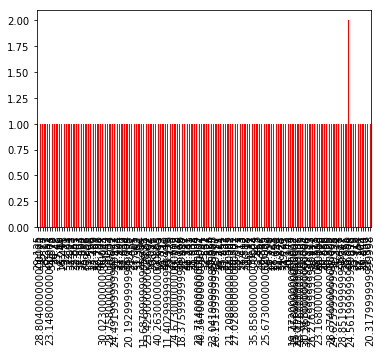

In [18]:
%matplotlib inline  

public_universities_rankings['tuition_and_fees'].value_counts(sort=False).plot.bar(color='r')


In [19]:
from pandas.api.types import CategoricalDtype
public_universities_rankings['location']=public_universities_rankings['location'].astype(CategoricalDtype(ordered=True))

In [20]:
public_universities_rankings['location'].cat.categories

Index(['Albany, NY', 'Albuquerque, NM', 'Ames, IA', 'Amherst, MA',
       'Ann Arbor, MI', 'Ashland, OH', 'Athens, GA', 'Athens, OH',
       'Atlanta, GA', 'Auburn, AL',
       ...
       'Tampa, FL', 'Tempe, AZ', 'Tucson, AZ', 'Tuscaloosa, AL',
       'University Park, PA', 'University, MS', 'Vermillion, SD',
       'West Lafayette, IN', 'Williamsburg, VA', 'Winchester, VA'],
      dtype='object', length=139)

In [42]:
df_operation_budget['expense_type'].describe

<bound method NDFrame.describe of 0       Operating Expense
1       Operating Expense
2       Operating Expense
3       Operating Expense
4       Operating Expense
5       Operating Expense
6       Operating Expense
7       Operating Expense
8       Operating Expense
9       Operating Expense
10      Operating Expense
11      Operating Expense
12      Operating Expense
13      Operating Expense
14      Operating Expense
15      Operating Expense
16      Operating Expense
17      Operating Expense
18      Operating Expense
19      Operating Expense
20      Operating Expense
21      Operating Expense
22      Operating Expense
23      Operating Expense
24      Operating Expense
25      Operating Expense
26      Operating Expense
27      Operating Expense
28      Operating Expense
29      Operating Expense
              ...        
4505    Operating Expense
4506    Operating Expense
4507    Operating Expense
4508    Operating Expense
4509    Operating Expense
4510    Operating Expense
4511

In [43]:
df_operation_budget['fund_type'].describe

<bound method NDFrame.describe of 0       Tax-Supported Fund
1       Tax-Supported Fund
2       Tax-Supported Fund
3       Tax-Supported Fund
4       Tax-Supported Fund
5       Tax-Supported Fund
6       Tax-Supported Fund
7       Tax-Supported Fund
8       Tax-Supported Fund
9       Tax-Supported Fund
10      Tax-Supported Fund
11      Tax-Supported Fund
12      Tax-Supported Fund
13      Tax-Supported Fund
14      Tax-Supported Fund
15      Tax-Supported Fund
16      Tax-Supported Fund
17      Tax-Supported Fund
18      Tax-Supported Fund
19      Tax-Supported Fund
20      Tax-Supported Fund
21      Tax-Supported Fund
22      Tax-Supported Fund
23      Tax-Supported Fund
24      Tax-Supported Fund
25      Tax-Supported Fund
26      Tax-Supported Fund
27      Tax-Supported Fund
28      Tax-Supported Fund
29      Tax-Supported Fund
               ...        
4505    Tax-Supported Fund
4506    Tax-Supported Fund
4507    Tax-Supported Fund
4508    Tax-Supported Fund
4509    Tax-Supported

In [44]:
df_operation_budget['expense_category'].describe

<bound method NDFrame.describe of 0                            2008 Parks Levy Fund Program
1                         Support to Multi-Purpose Trails
2                         Support to Multi-Purpose Trails
3                         Library Levy Operating Transfer
4                         Library Levy Operating Transfer
5                         Library Levy Operating Transfer
6                                 Administrative Services
7                      Community Development and Outreach
8                                   Cultural Partnerships
9               Langston Hughes Performing Arts Institute
10                                    Municipal Arts Fund
11                                Administrative Services
12                     Community Development and Outreach
13                                  Cultural Partnerships
14              Langston Hughes Performing Arts Institute
15                                    Municipal Arts Fund
16                           Administr